In [1]:
import pandas as pd


**training**

In [1]:

from pipeline.pipeline import pre_processing,gridsearch_metrics
import pandas as pd
data= pd.read_csv('dataset/employees_dataset.csv')
pipeline_rf,param_grid_rf,pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test= pre_processing(data, 0,0)
print("Random forest: ")
gridsearch_metrics(pipeline_rf, param_grid_rf, X_train, X_test, y_train, y_test)
print("Logistique regression: ")
gridsearch_metrics(pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test)

Random forest: 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
accuracy: 0.8707482993197279
recall: 0.21212121212121213
f1score: 0.32941176470588235
Logistique regression: 
Fitting 5 folds for each of 12 candidates, totalling 60 fits
accuracy: 0.780045351473923
recall: 0.6666666666666666
f1score: 0.4756756756756757


(array([6.91743523e-02, 4.09639772e-01, 9.01435379e-02, 3.42861892e-01,
        4.47247446e-01, 2.87663613e-01, 7.84786253e-02, 6.51798435e-01,
        4.35165198e-01, 5.42742788e-01, 4.05069364e-01, 6.48871627e-01,
        2.68345412e-01, 2.74806570e-01, 2.65999595e-01, 3.33289416e-01,
        7.29519119e-01, 4.12878051e-01, 2.81960024e-02, 9.09008122e-01,
        1.06744178e-01, 1.23896949e-03, 9.71680081e-02, 2.84910959e-01,
        5.28926187e-01, 7.12219662e-02, 1.76278380e-01, 2.24396560e-01,
        6.31372642e-02, 3.07524255e-01, 6.85551080e-02, 3.05089684e-01,
        8.58340891e-03, 4.30729647e-02, 2.83875949e-02, 4.76079727e-01,
        3.43584585e-02, 2.25247491e-01, 6.67299354e-01, 1.72071985e-01,
        9.08445165e-01, 5.43248426e-02, 1.33774187e-01, 1.15986696e-01,
        3.54854808e-01, 4.65885063e-02, 6.19345151e-01, 1.81248979e-02,
        4.99121572e-02, 5.38125789e-01, 1.91483394e-01, 1.79045868e-01,
        6.98811666e-01, 8.18952453e-02, 5.94020593e-01, 5.559835

**after applying RobustScaler()**


In [2]:
from pipeline.pipeline import pre_processing,gridsearch_metrics
import pandas as pd
data= pd.read_csv('dataset/employees_dataset.csv')
pipeline_rf,param_grid_rf,pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test= pre_processing(data,0,1)
print("Random forest: ")
gridsearch_metrics(pipeline_rf, param_grid_rf, X_train, X_test, y_train, y_test)
print("Logistique regression: ")
gridsearch_metrics(pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test)

Random forest: 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
accuracy: 0.8752834467120182
recall: 0.2857142857142857
f1score: 0.42105263157894735
Logistique regression: 
Fitting 5 folds for each of 12 candidates, totalling 60 fits
accuracy: 0.7664399092970522
recall: 0.7571428571428571
f1score: 0.507177033492823


c:\Users\hp\Documents\projects\simplon_projects\backend_predicteur_de_depart_et_assistant_rh\env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([0.12814806, 0.51828897, 0.02271726, 0.182589  , 0.95559109,
        0.05712504, 0.42544946, 0.6705448 , 0.02523306, 0.22367337,
        0.01168705, 0.1290397 , 0.96503498, 0.2010488 , 0.35501081,
        0.1962817 , 0.11976883, 0.12399731, 0.0494629 , 0.22700565,
        0.12372485, 0.6745541 , 0.42481324, 0.18939442, 0.40825777,
        0.28800567, 0.40727181, 0.15062881, 0.0886898 , 0.09035835,
        0.15217395, 0.86487048, 0.34129304, 0.24681606, 0.15480654,
        0.29541225, 0.20166278, 0.62685256, 0.1095825 , 0.29160372,
        0.03896892, 0.12302392, 0.66937528, 0.40198598, 0.73599229,
        0.31285698, 0.46377539, 0.01509886, 0.63176342, 0.83070185,
        0.04046262, 0.09164331, 0.45229367, 0.06713128, 0.79272521,
        0.91486097, 0.38500745, 0.537404  , 0.67608474, 0.11039883,
        0.82793664, 0.30622769, 0.14103666, 0.13517819, 0.84997715,
        0.88795182, 0.55436488, 0.32374041, 0.61109   , 0.4090629 ,
        0.08357435, 0.20528656, 0.09562218, 0.08

**After using SMOTE**

In [3]:
from pipeline.pipeline import pre_processing,gridsearch_metrics
import pandas as pd
data= pd.read_csv('dataset/employees_dataset.csv')
pipeline_rf,param_grid_rf,pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test= pre_processing(data,1,1)
print("Random forest: ")
y_predict_proba_rf, y_predict= gridsearch_metrics(pipeline_rf, param_grid_rf, X_train, X_test, y_train, y_test)
print("Logistique regression: ")
y_predict_proba_lr,y_predict= gridsearch_metrics(pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test)



Random forest: 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
accuracy: 0.8458049886621315
recall: 0.3424657534246575
f1score: 0.423728813559322
Logistique regression: 
Fitting 5 folds for each of 12 candidates, totalling 60 fits
accuracy: 0.7845804988662132
recall: 0.7671232876712328
f1score: 0.5410628019323671


c:\Users\hp\Documents\projects\simplon_projects\backend_predicteur_de_depart_et_assistant_rh\env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


- **Comme notre dataset est déséquilibré, on a regardé surtout le recall et le F1-score pour choisir le modèle. La régression logistique a des valeurs plus élevées que Random Forest, donc on a décidé de l’enregistrer et de l’utiliser pour notre application.**

**Matrice de confusion**

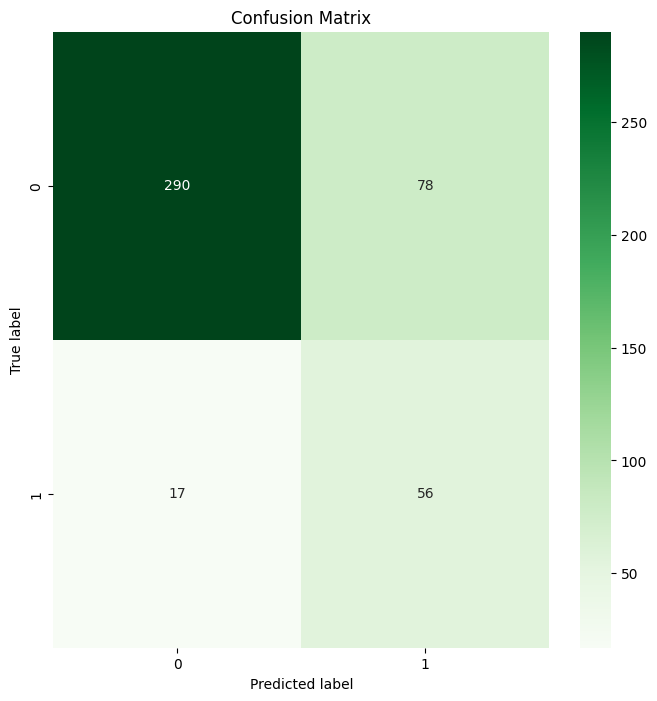

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



**Courbe ROC**

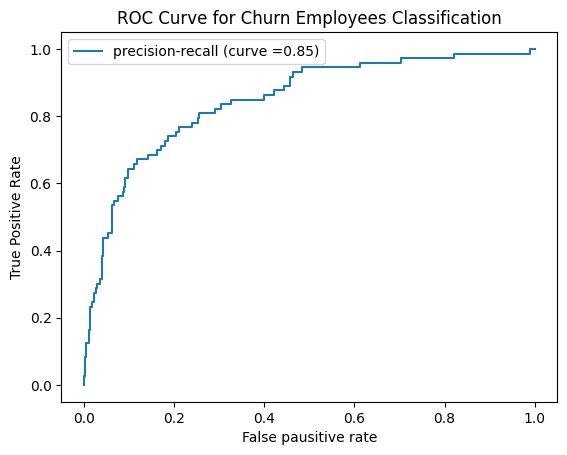

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr , thresholds=roc_curve(y_test, y_predict_proba_lr)
roc_auc= auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"precision-recall (curve ={roc_auc:.2f})")
plt.title('ROC Curve for Churn Employees Classification')
plt.xlabel('False pausitive rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


**Observation**

   - L’AUC montre une valeur de 0,85, ce qui indique que le modèle est capable de discriminer les classes,
mais le recall est faible, ce qui signifie un déséquilibre au niveau des données.